#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

Mounted at /content/drive


Found 128 files belonging to 3 classes.
Found 26 files belonging to 3 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 2

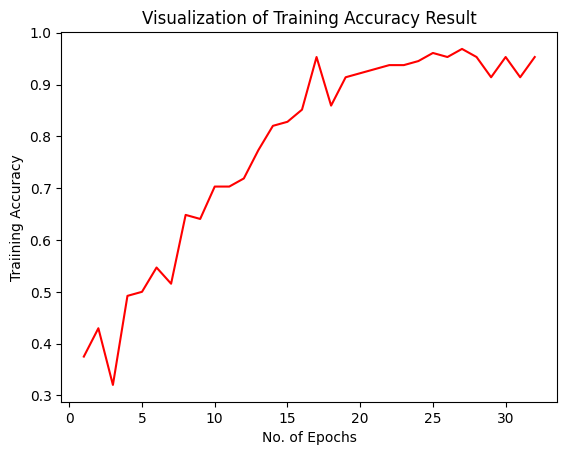

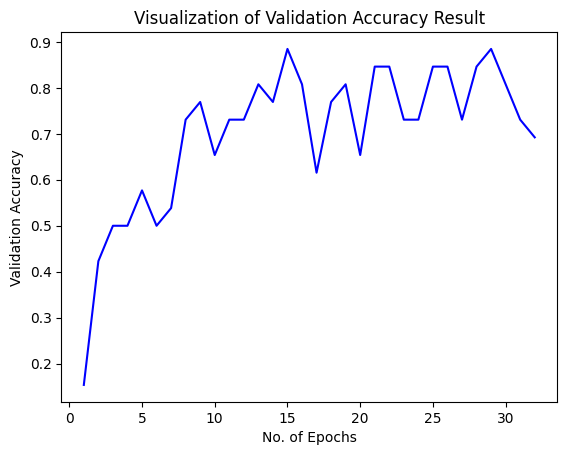

['G1-G12-B2 Model Class', 'Junk', 'Smart_Cylinder_Door_Lock']
Number of classes: 3
Training accuracy: 1.0
Validation accuracy: 0.692307710647583
Validation set Accuracy: 69.2307710647583 %


In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Recognition_system/training',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Recognition_system/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax')) #the number of units is the number of my output classes
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()
class_names = training_set.class_names

training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
val_loss, val_acc = cnn.evaluate(validation_set)


cnn.save('/content/drive/MyDrive/Recognition_system/trained_model.h5')
training_history.history #Return Dictionary of history

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

print(class_names)
print(f"Number of classes: {len(class_names)}")
print('Training accuracy:', train_acc)
print('Validation accuracy:', val_acc)
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


# Loading Model





In [ ]:
# Load the trained model
cnn = tf.keras.models.load_model('/content/drive/MyDrive/Recognition_system/trained_model.h5')

# Assuming images is a list of PIL images
image_size = (64, 64)  # Desired image size

# Convert PIL images to numpy arrays
images_np = [np.array(img.resize(image_size)) for img in images]

# Convert numpy arrays to tensors
images_tensors = tf.convert_to_tensor(images_np)

# Create labels (dummy labels in this case, you need to provide the actual labels if available)
labels = tf.zeros((len(images_np),), dtype=tf.int32)  # Replace with actual labels if available

# Combine images and labels into a tf.data.Dataset
test_set = tf.data.Dataset.from_tensor_slices((images_tensors, labels))

# Apply batching and other transformations if needed
test_set = test_set.batch(32).shuffle(buffer_size=1000)

# Now you can use test_set in your model
# Evaluate the model
test_loss, test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

print(cnn, test_set)




NameError: name 'images' is not defined

In [ ]:
# Load the trained model
cnn = tf.keras.models.load_model('/content/drive/MyDrive/Recognition_system/trained_model.h5')


# Load the test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Recognition_system/testing',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True
)

# Evaluate the model
test_loss, test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

print(cnn, test_set)

Found 5 files belonging to 3 classes.
1/1 [==============================] - 3s 3s/step - loss: 0.9583 - accuracy: 0.8000
Test accuracy: 0.800000011920929
<keras.src.engine.sequential.Sequential object at 0x78f653d6a3e0> <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 29ms/step


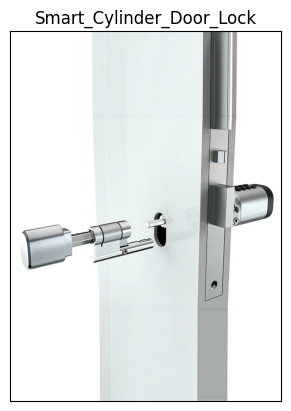

Class names: ['G1-G12-B2 Model Class', 'Junk', 'Smart_Cylinder_Door_Lock']
Predictions: [[0.3318951  0.16097069 0.50713426]]
Max probability: 0.50713426
Predicted class name: Smart_Cylinder_Door_Lock
1/1 [==============================] - 0s 34ms/step


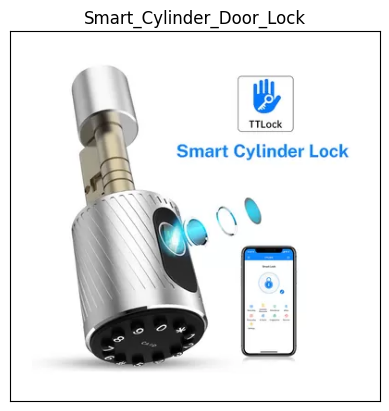

Class names: ['G1-G12-B2 Model Class', 'Junk', 'Smart_Cylinder_Door_Lock']
Predictions: [[6.4468719e-09 8.1381046e-08 9.9999988e-01]]
Max probability: 0.9999999
Predicted class name: Smart_Cylinder_Door_Lock
1/1 [==============================] - 0s 27ms/step


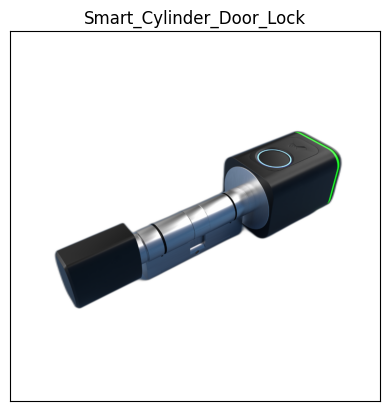

Class names: ['G1-G12-B2 Model Class', 'Junk', 'Smart_Cylinder_Door_Lock']
Predictions: [[3.0567856e-03 5.8476743e-04 9.9635845e-01]]
Max probability: 0.99635845
Predicted class name: Smart_Cylinder_Door_Lock
1/1 [==============================] - 0s 31ms/step


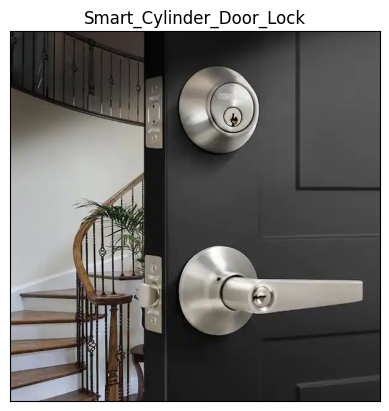

Class names: ['G1-G12-B2 Model Class', 'Junk', 'Smart_Cylinder_Door_Lock']
Predictions: [[2.8686313e-04 3.6133858e-03 9.9609971e-01]]
Max probability: 0.9960997
Predicted class name: Smart_Cylinder_Door_Lock
1/1 [==============================] - 0s 31ms/step


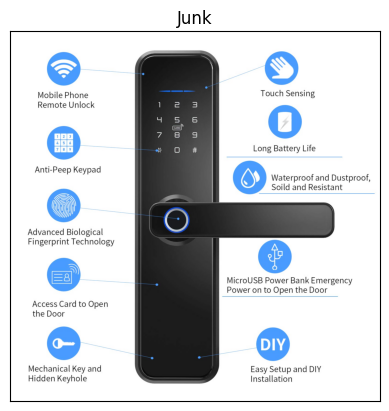

Class names: ['G1-G12-B2 Model Class', 'Junk', 'Smart_Cylinder_Door_Lock']
Predictions: [[0.01879467 0.9756447  0.00556064]]
Max probability: 0.9756447
Predicted class name: Junk
1/1 [==============================] - 0s 25ms/step


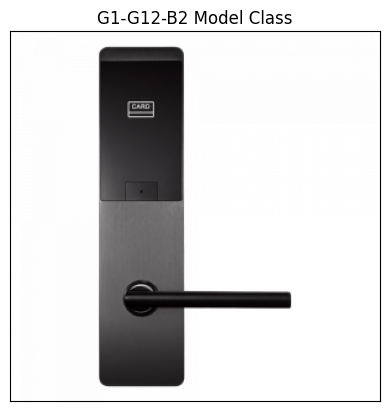

Class names: ['G1-G12-B2 Model Class', 'Junk', 'Smart_Cylinder_Door_Lock']
Predictions: [[9.996673e-01 3.315648e-04 1.183273e-06]]
Max probability: 0.9996673
Predicted class name: G1-G12-B2 Model Class
1/1 [==============================] - 0s 27ms/step


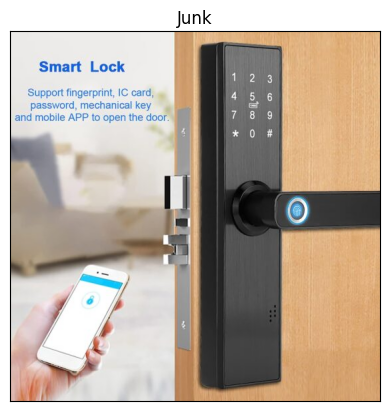

Class names: ['G1-G12-B2 Model Class', 'Junk', 'Smart_Cylinder_Door_Lock']
Predictions: [[0.41455477 0.24413377 0.34131145]]
Max probability: 0.41455477
Predicted class name: Junk
1/1 [==============================] - 0s 26ms/step


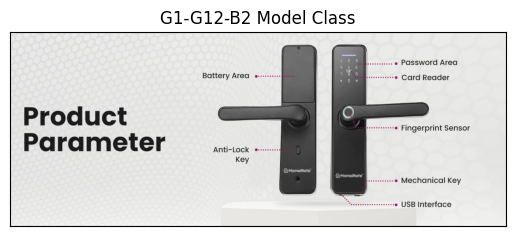

Class names: ['G1-G12-B2 Model Class', 'Junk', 'Smart_Cylinder_Door_Lock']
Predictions: [[0.7790792  0.00355728 0.2173636 ]]
Max probability: 0.7790792
Predicted class name: G1-G12-B2 Model Class
1/1 [==============================] - 0s 26ms/step


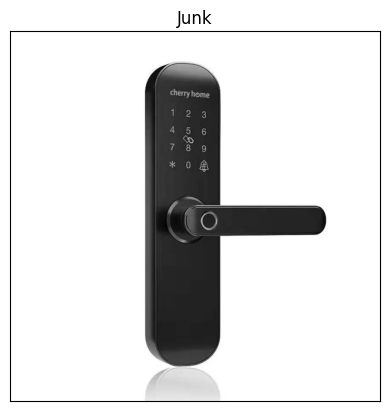

Class names: ['G1-G12-B2 Model Class', 'Junk', 'Smart_Cylinder_Door_Lock']
Predictions: [[0.350968   0.6436095  0.00542251]]
Max probability: 0.6436095
Predicted class name: Junk
1/1 [==============================] - 0s 27ms/step


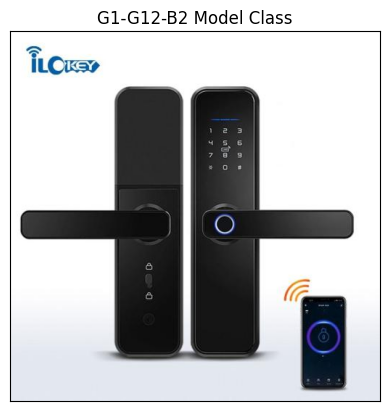

Class names: ['G1-G12-B2 Model Class', 'Junk', 'Smart_Cylinder_Door_Lock']
Predictions: [[9.9999976e-01 1.6350649e-10 2.7438480e-07]]
Max probability: 0.99999976
Predicted class name: G1-G12-B2 Model Class


In [ ]:
def predict_image(cnn, test_set, urls):
    results = []
    for image_path in urls:
        try:
            # Reading an image in default mode
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

            # Preprocessing the image
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
            input_arr = tf.keras.preprocessing.image.img_to_array(image)
            input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to batch

            # Getting the model's predictions
            predictions = cnn.predict(input_arr)
            max_prob = max(predictions[0])

            if max_prob < 0.5:
                predicted_product_name = "Junk"
            else:
                result_index = np.argmax(predictions[0])
                predicted_product_name = test_set.class_names[result_index]

            results.append(predicted_product_name)

            # Displaying the image
            plt.imshow(img)
            plt.title(predicted_product_name)
            plt.xticks([])
            plt.yticks([])
            plt.show()

            # Print the predictions and result index
            print("Class names:", test_set.class_names)
            print("Predictions:", predictions)
            print("Max probability:", max_prob)
            print("Predicted class name:", predicted_product_name)

        except Exception as e:
            print(f"Error processing image {image_path}: {e}")
            results.append("Error")

    return results

# A function that returns the testing images URLs
def image_urls():
    urls = []
    def list_files_in_directory(directory):
        files = []
        for root, dirs, filenames in os.walk(directory):
            for filename in filenames:
                files.append(os.path.join(root, filename))
        return files

    # Directory containing the test images
    directory = '/content/drive/MyDrive/Recognition_system/testing'

    # List all files in the directory
    files = list_files_in_directory(directory)
    for file in files:
        urls.append(file)
    return urls

# Test Image URLs
urls = image_urls()
predicted_classes = predict_image(cnn, test_set, urls)



In [ ]:
predicted_classes

['Smart_Cylinder_Door_Lock',
 'Smart_Cylinder_Door_Lock',
 'Smart_Cylinder_Door_Lock',
 'Smart_Cylinder_Door_Lock',
 'Junk',
 'G1-G12-B2 Model Class',
 'Junk',
 'G1-G12-B2 Model Class',
 'Junk',
 'G1-G12-B2 Model Class']